# ASSIGNMENT II - HANC with a Welfare State

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np

from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

## Setup and tests

In [2]:
model = HANCWelfareModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
path = model.path

### Test 1: Solving and simulating the household problem

We set all the steady values for the household problem manually at ad hoc values:

In [4]:
ss.r  = 0.02 * (1 - 0.1)
ss.wt = 1.00 * (1 - 0.3)
ss.S = np.min([par.G_ss, par.L_G_ss*par.Gamma_G])

We can now solve and simulate:

In [5]:
model.solve_hh_ss(do_print=True)

household problem in ss solved in 0.2 secs [345 iterations]


In [6]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 4.3 secs [425 iterations]


And we can check whether the results make sort of sense:

In [7]:
print(f'{model.ss.A_hh = :.2f}')
print(f'{model.ss.L_hh = :.2f}')
print(f'{model.ss.C_hh = :.2f}')

model.ss.A_hh = 2.03
model.ss.L_hh = 1.06
model.ss.C_hh = 0.78


We check whether the ... clears 

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.6 secs
household problem simulated along transition in 1.4 secs



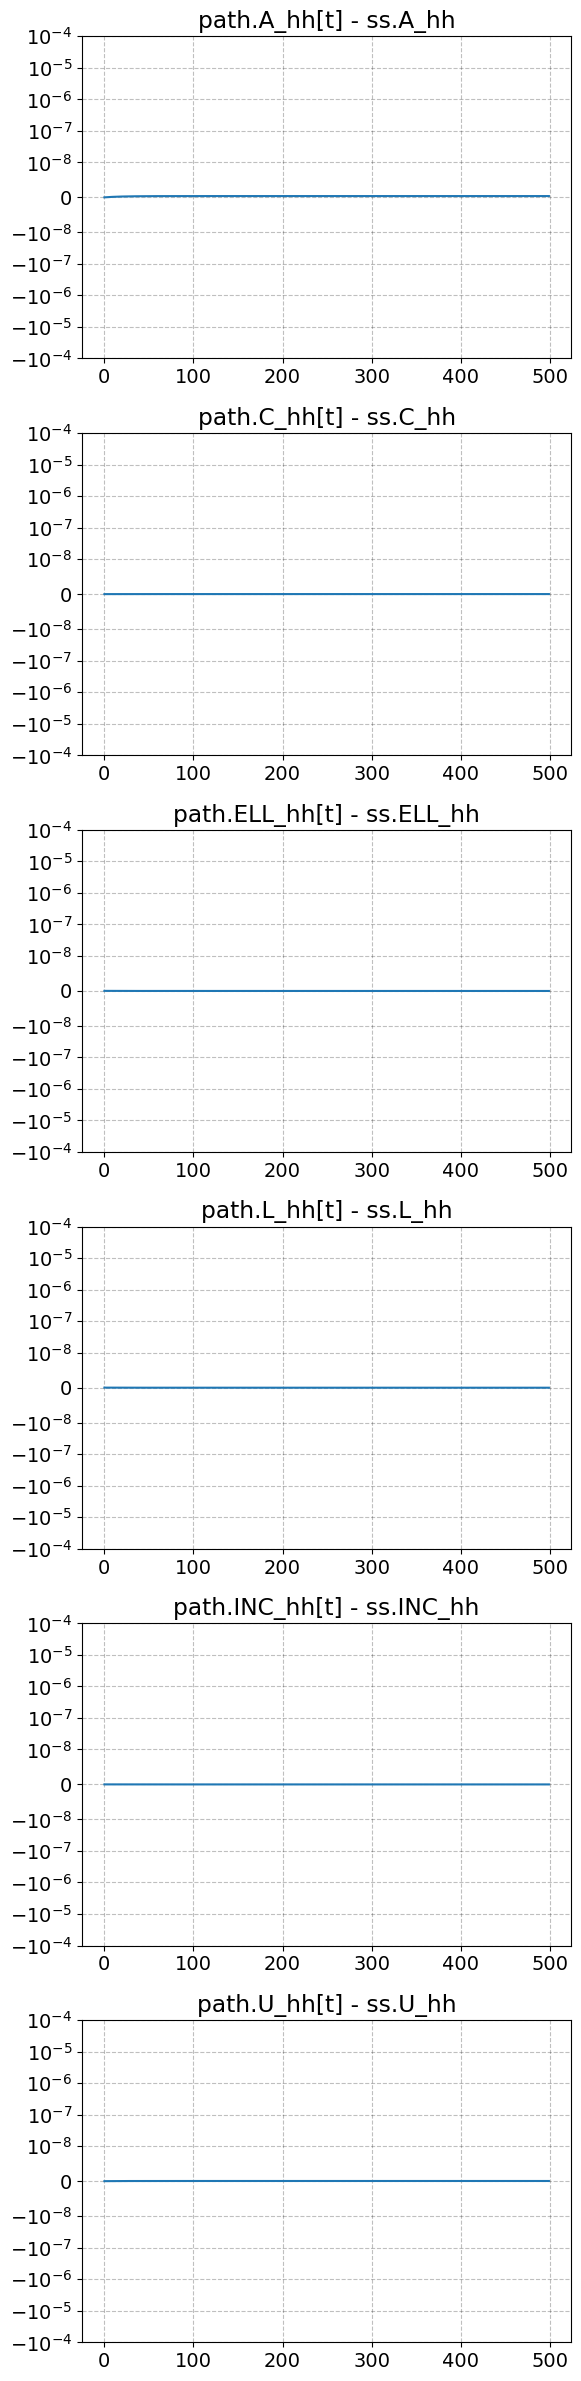

In [8]:
model.test_hh_path()

### Test 2: Evaluating the objective for finding the steady state

See for which K/L the steady state .. 

In [9]:
for KL in [1.0,2.0,3.0,4.0]:
    for tau in [0.0, 0.04, 0.05]:
        clearing_A, clearing_G = obj_ss(np.array([KL, tau]),model,do_print=False)
        print(f'{KL = :.2f}, {tau = :.2f} -> {clearing_A = :12.8f}, {clearing_G = :12.8f}')

/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/3. semester/HANK/3. Assignments/Assignment 2/steady_state.py:82: RuntimeWarning: invalid value encountered in scalar power
  ss.Y = par.Gamma_Y * ss.K**(par.alpha) * ss.L_Y**(1-par.alpha)


KL = 1.00, tau = 0.00 -> clearing_A = -107.53112536, clearing_G =   0.34000000
KL = 1.00, tau = 0.04 -> clearing_A = -107.53092381, clearing_G =   0.33985120
KL = 1.00, tau = 0.05 -> clearing_A = -107.53087611, clearing_G =   0.33981593
KL = 2.00, tau = 0.00 -> clearing_A = -102.40780891, clearing_G =   0.37236022
KL = 2.00, tau = 0.04 -> clearing_A = -102.40850914, clearing_G =   0.37146184
KL = 2.00, tau = 0.05 -> clearing_A = -102.40869344, clearing_G =   0.37124884
KL = 3.00, tau = 0.00 -> clearing_A = -27.53231808, clearing_G =   0.39465448
KL = 3.00, tau = 0.04 -> clearing_A = -26.75061966, clearing_G =   0.37553700
KL = 3.00, tau = 0.05 -> clearing_A = -26.55329985, clearing_G =   0.37067410
KL = 4.00, tau = 0.00 -> clearing_A =   1.15235150, clearing_G =   0.41220032
KL = 4.00, tau = 0.04 -> clearing_A =   1.25218083, clearing_G =   0.37180825
KL = 4.00, tau = 0.05 -> clearing_A =   1.27768932, clearing_G =   0.36153370


## a) Find the stationary equilibrium without a government $(G_t = L^G_t = \chi_t = 0)$. Report the expected discounted utility.

### Find the stationary equilibrium 

In [10]:
par.G_ss = 0.0
par.L_G_ss = 0.0
model.find_ss(do_print=True)

starting at KL = [3.8624] and tau = [0.0300]

 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.743e-10  1.616e-11]
       x: [ 3.673e+00 -1.694e-11]
    nfev: 10
    fjac: [[-1.000e+00  3.869e-03]
           [-3.869e-03 -1.000e+00]]
       r: [-8.140e+00 -2.955e+00  9.831e-01]
     qtf: [ 1.592e-08  1.537e-09]

steady state found in 3.1 secs
ss.K =  3.389
ss.B =  0.000
ss.A_hh =  3.389
ss.L_Y =  0.923
ss.L_G =  0.000
ss.G =  0.000
ss.tau = -0.000
ss.S =  0.000
ss.Y =  1.363
ss.r =  0.021
ss.w =  1.034
ss.clearing_A = 1.74e-10
ss.clearing_L = 0.00e+00
ss.clearing_Y = 2.01e-11
ss.clearing_G = 1.62e-11


### Expected discounted utility

In [11]:
va = np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
print('Expected discounted utility = ', va.round(4))

Expected discounted utility =  nan


/var/folders/_0/__2l_zk5425dbzpq1s84wr8r0000gn/T/ipykernel_73096/3343424792.py:1: RuntimeWarning: invalid value encountered in divide
  va = np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])


In [12]:
# model.test_ss()

## b) Find optimal welfare policies I. Choose $G_t$ and $L^G_t$ to maximize expected discounted utility in the stationary equilibrium. Keep $\chi_t = 0$. Report $G_t$/$Y_t$.

In [13]:
for i in np.arange(0, 1.1, 0.1):
    par = model.par
    path = model.path
    ss = model.ss

    par.G_ss = i 
    par.L_G_ss = par.G_ss

    model.find_ss(do_print=False)  # Print intermediate values
    print(f'{ss.S = :6.3f} and {ss.U_hh = :6.3f} and {par.L_G_ss = :6.3f}')
    U = np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
    print(U)

ss.S =  0.000 and ss.U_hh = -100000001.618 and par.L_G_ss =  0.000
nan


/var/folders/_0/__2l_zk5425dbzpq1s84wr8r0000gn/T/ipykernel_73096/3750271301.py:11: RuntimeWarning: invalid value encountered in divide
  U = np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])


ss.S =  0.100 and ss.U_hh = -11.867 and par.L_G_ss =  0.100
nan
ss.S =  0.200 and ss.U_hh = -7.177 and par.L_G_ss =  0.200
nan
ss.S =  0.300 and ss.U_hh = -5.901 and par.L_G_ss =  0.300
nan
ss.S =  0.400 and ss.U_hh = -5.564 and par.L_G_ss =  0.400
nan
ss.S =  0.500 and ss.U_hh = -5.702 and par.L_G_ss =  0.500
nan
ss.S =  0.600 and ss.U_hh = -6.217 and par.L_G_ss =  0.600
nan
ss.S =  0.700 and ss.U_hh = -7.203 and par.L_G_ss =  0.700
nan
ss.S =  0.800 and ss.U_hh = -10.015 and par.L_G_ss =  0.800
nan
ss.S =  0.900 and ss.U_hh = -10.438 and par.L_G_ss =  0.900
nan
ss.S =  1.000 and ss.U_hh = -10.905 and par.L_G_ss =  1.000
nan


In [ ]:
# def optimize_expected_discounted_utility(x, model):
#     par = model.par
#     path = model.path

#     par.G_ss = x[0]
#     par.L_G_ss = par.G_ss
#     print(par.G_ss)
#     try:
#         model.find_ss(do_print=False)  # Print intermediate values
#         U = np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
#     except Exception as e:
#         print(f"Error during steady-state calculation: {e}")
#         U = np.nan

#     return np.array([U])

In [ ]:
# initial_guess =  np.array([0.5])
# bounds = optimize.Bounds(lb=0, ub=1, keep_feasible=False)
# res = optimize.minimize(optimize_expected_discounted_utility, initial_guess, args=(model,),method='Nelder-Mead', bounds = bounds)
# print(res)

## c) Find optimal welfare policies II. Repeat b) allowing for $\chi_t \neq 0$. Discuss whether positive or negative transfer are optimal.

## d) Increased TFP. Repeat question c) with $\Gamma^Y = 1.1$. Comment on the differences.

## e) Transition path. Compute the transition path from the stationary equilibrium in c) to the one in d). Argue for you choice of policies path of $G_t$, $L^G_t$ and $\chi_t$.